### Titanic Data Science Solutions: I practiced data exploration using this notebook to go through a typical workflow for solving the Titanic Kaggle competitions. Reference: https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions

### Workflow stages:
1. Define questions
2. Acquire training and testing data
3. Clean and prepare data
4. Analyze and explore data, and identify patterns
5. Build model to make predictions and answer the questions
6. Visualize and present the problem solving steps and final solutions
7. Submit the results

We may anlyze and explore data prior to clean data.
We may visualize data multiple times along multiple stages.

### Problem definition: 
Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


### Insights:
On 1912, the Titanic sank after colliding with an iceberg, killing 1501 out of 2224 passengers and crew. Translated 32% survival rate.
One major reason that the shipwreck led to such loss of life was that there was not enough lifeboats for the passengers and crew.
Although luck plays a role in surviving the sink, some groups of people were more likely to survive than others, such as children, women, and upper-class.

### Workflow goals
The data science solutions workflow solves for 7 major goals:
Classifying: 
We may want to classify or categorize our samples and understand the implications and correlations of different classes.

Correlating: 
We want to know which features within the dataset contribute significantly to solution goal and determine the correlations among features to help in creating, completing and correcting features.

Converting: Depending on the requirements of model algorithm we use, we may need to convert all features to numerical equivalent values. 

Completing: 
We may need to estimate and fill in the missing values within a feature to prepare data for model algorithms which work best when there are no missing values.

Correcting: 
We may need to analyze the training dataset to detect outliers, errors or possibly inacurate values within features. We can end up correcting these values, or completely discard a feature if it is not contributing to the analysis or may significantly skew the results.

Creating: 
We may create new features based on an existing feature or a set of features, such that the new feature follows correlation, conversion, completeness goals.

Charting: 
We need to choose the right visualization plots and charts depending on the nature of the data and the solution goal. 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine learning 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

### Acquire data
##### we start by acquiring the training and testing datasets(in CSV format) into Pandas DataFrames for future data exploration and analysis.
##### We also combine the two sets of datasets to run certain operations on both datasets together.
##### We check on the shape (n of obserations, n of features) of each of the DataFrame.

In [2]:
# pandas.read_csv needs a file-like object as the first argument. 
# You need to use the url given by the 'Raw' link in the github page for getting raw csv response.
train_df = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv")
test_df = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/test.csv")
print('train data:', train_df.shape)
print('test data:', test_df.shape)

combine = [train_df, test_df]
print('combine data:', len(combine))

train data: (891, 12)
test data: (418, 11)
combine data: 2


### Analyze by describing data
Pandas help describe the datasets answering following questions early in our project.
#### Which features are available in the dataset?

In [3]:
print("#"*10, 'Train dataset has following features', "#"*10)
train_df.columns.values

########## Train dataset has following features ##########


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
# preview the training data - head
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# preview the training data - tail
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Which features are categorical?
In categorical feature, different values classify the samples into sets of similar samples.
Within categorical features are the values: nominal, ordinal, or interval based.
This helps us select the suitable plots for visualization.
##### Categorical features: (Nominal) Survived, Sex, Embarked; (Ordinal) Pclass

#### Which features are numerical?
Within numerical features are the values: discrete, continous, or timeserires based.
This helps us select the suitable plots for visualization.
##### Continous features: (Continous) Age, Fare; (Discrete) SibSp, Parch

#### Which features are mixed data types?
Numeric and alphanumeric data within the same feature. Those are candidates for correcting goal.
Ticket is a mix of numerica and alphanumeric data types. 
Cabin is alphanumeric.

#### Which features may contain errors or typos?
Name feature may contain typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names. Those are candidates for correcting goal.


In [6]:
# Check on the datatypes and null/missing values of each of the feature
print('#'*20, 'train data set', '#'*20)
train_df.info()
print('#'*20, 'test data set', '#'*20)
test_df.info()

#################### train data set ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
#################### test data set ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-

#### Which features contain blank, null or empty values?
Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are imcomplete in testing dataset.
Those features require correcting and completing.

7 features are int64 or float64 types in training dataset.
6 features are int64 or float64 types in testing dataset. 
5 features are object (strings) in both training and testing dataset. 

In [7]:
train_df.describe()

C:\Users\fengh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### What is the distribution of numeric feature values across the samples?
This helps us determine how representative is the training dataset of the actual problem domain.
1. The total samples are 891 or 40% of the actual number of passengers on board the Titanic (2224 passengers in total).
2. Survived is the target response with two values (0 for not survived; 1 for survived) as categorical type.
3. Around 38% (mean in Survived feature) samples in training dataset survived, representative of the actual survival rate at 32%.
4. Most passengers(around 68%) did not have siblings or spouse aboard.
5. Most passengers(around 76%) did not have parents or children aboard.
6. Fares varied significantly.
7. Age ranges from 0.4 to 80 years old.

In [11]:
# check on the distribution of features in Object (string) type
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mr. John Borland",male,1601,B96 B98,S
freq,1,577,7,4,644


In [12]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### What is the distribution of numeric feature values across the samples?
1. Names are unique across the dataset (count=unique=891).
2. Sex feature has 2 possible values with 65% maile (577/891=65%).
3. Cabin has several duplicates across samples (unique=147 < count=891). Several passengers share a cabin.
4. Embarked has 3 possible values with around 72% (644/891) passengers took on 'S' port. 
5. Ticket has 22% of duplicate values ((681-891)/891).

### Assumptions based on data exploration
1. Correlating: We want to know how well does each feature correlate with Survival.
2. Completing: We want to complete 'Age' feature as it definitely correlate to survival. We want to complete 'Embarked' feature as it may aslo correlate with survival or other important features.
3. Correcting: 'Cabin' feature may be dropped as it is highly incomplete in both training and testing dataset. 'PassengerId' may be dropped as it does not contribute to survival. 'Name' feature is relatively non-standard in format and we might need feature engieering it. 'Ticket' may be dropped as it contains high ratio of duplicates and there not be a correlation between it and survival.
4. Creating: we may create new feature called 'Family' based on Parch and SibSp to get total counts of family members on board. We may engineer 'Name' to extract title as a new feature. We may create new feature for 'Age' to turn a continous numerica feature into ordinal categorical feature. We may create a Fare range feature to further categorize 'Fare'. 
5. Classifying: Women(Sex=female) were more likely to have survived. Children(Age< ?) were more likely to have survived. The upper class passengers (Pclass=1) were more likely to have survived.

### Analyze by pivoting features
We can pivot features against each other to analyze our feature correlations. 
This can only be done for feature that does not contain any empty values.

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
from scipy.stats import spearmanr
spearmanr(train_df.Sex, train_df.Survived)

C:\Users\fengh\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.54335138065775512, pvalue=1.4060661308802594e-69)

In [19]:
spearmanr(train_df.Pclass, train_df.Survived)

SpearmanrResult(correlation=-0.33966793665005257, pvalue=1.6876081409966053e-25)

In [20]:
spearmanr(train_df.Fare, train_df.Survived)

SpearmanrResult(correlation=0.32373613944480834, pvalue=3.4712279702070052e-23)

In [21]:
spearmanr(train_df.Parch, train_df.Survived)

SpearmanrResult(correlation=0.13826563286545587, pvalue=3.453591460380432e-05)

In [22]:
spearmanr(train_df.SibSp, train_df.Survived)

SpearmanrResult(correlation=0.088879484680905008, pvalue=0.0079414312857335329)

### Analyze by visualizing data
We use plots to further understand the assumptions and confirm intuititons.

#### A histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. 
X: Bins/ Ranges of feature
Y: count of samples for certain bin
This helps us answer questions relating to specific bands (Did infants have better survival rates?)

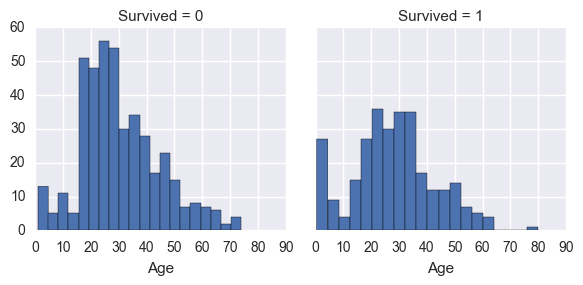

In [23]:
# Generate 2 Grid plots, one for Survived = 0 and another for Survived = 1
grid = sns.FacetGrid(train_df, col='Survived') 
grid.map(plt.hist, 'Age', bins=20)

In [24]:
# Draw a 重叠histogram 也许更直观

#### Observations
1. Little kids (Age<5) had high survival rates.
2. Oldest passengers (Age=80) survived.
3. Large number of young people (Age in 15-25 range) did not survive.
4. Most passengers are in 115-35 range.

#### Decisions
1. Consider Age for model training since Age is of great importance for predicting suvival. 
2. Complete missing values in Age feature to enable model construction.
3. Band age groups (Q: How to group passengers in terms of Age?).

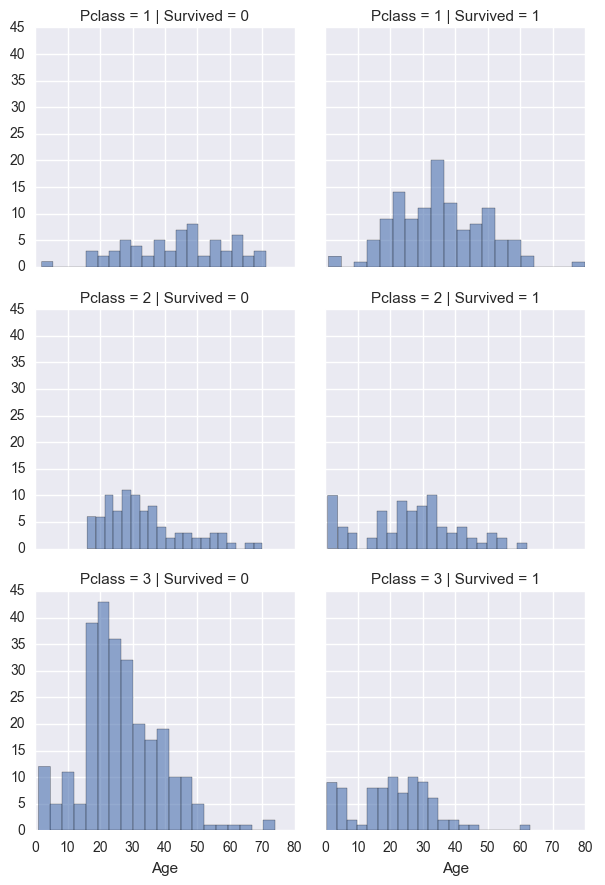

In [25]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=0.6, bins=20)
grid.add_legend()

#### Observations
1. Pclass=3 had most passengers. But most did not survive. 
2. Infants in Pclass=2 and Pclass=3 mostly survived.
3. Most passengers in Pclass=1 survived.
4. Pclass varies in terms of Age distribution of passengers.
#### Decisions
1. Consider Pclass for model training since it plays an important role in survival.

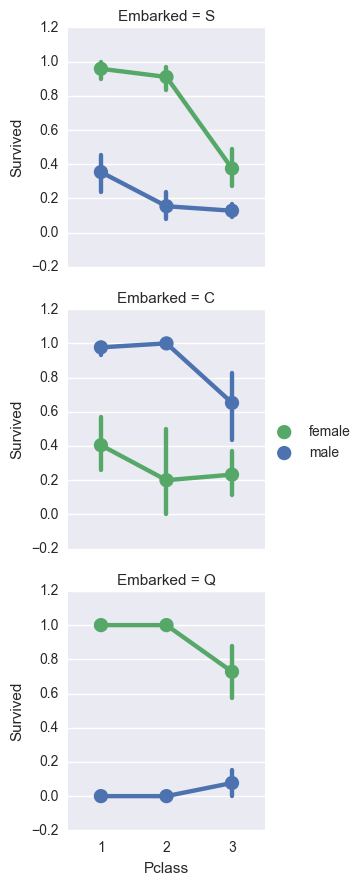

In [26]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


#### Observations:
1. Female passengers had much higher survival rate than male with an exception in Embarked = Cwhere male had higher survial rate. This could be a correlation between Pclass and Embarked and in turn PClass and Survived. 
2. Males had higher survial rates in Pclass=3  when compared with Pclass=2 for C and Q ports. 
3. Ports of embarkation have varing survial rates for Pclass=3 among male passengers in ordering. Thoughts: Passengers embarked from port 'Q' might have high education and social status. Among those, the most educated male passengers kindly sacrifice their living chances to females (In Embarked=Q the distance between suvival rates for female and male in Pclass 1 and 2 are much larger than other embarkations.) Among those, only males in Pclass=3 did not fully sacrifice themselves to save females' life, resulting in a decreased distance.

#### Decisions:
1. Add Sex feature to model training.
2. Complete and add Embarked fature to model training.

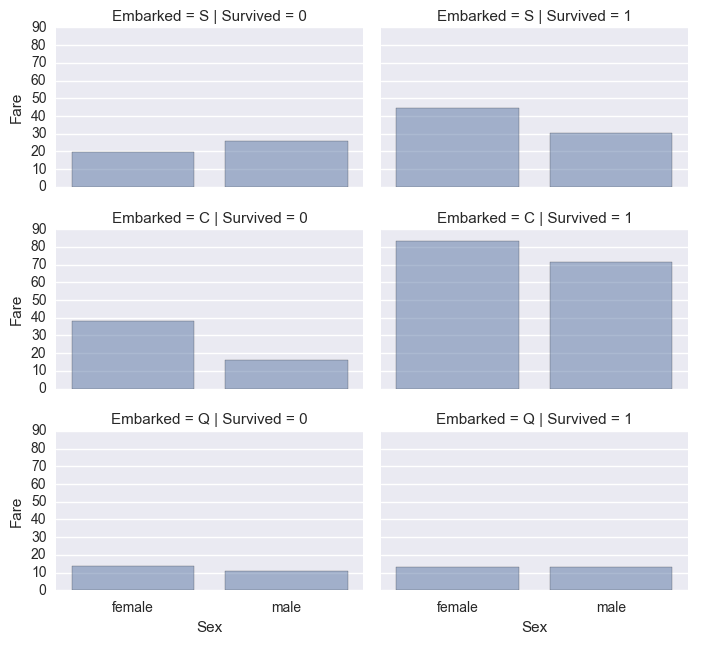

In [27]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#### Observations:
1. Higher fare paying passengers had higher survival rate. 
2. Port of embarkation correlates with suvival rates.  passengers embarked from port 'C' had higher survival rate compared to 'S' and 'Q'.
3. Female tends to have higher survival rate then male regardless of Fare and Embarked.

#### Decisions:
1. Consider banding Fare feature.

### Wrangle data

#### Correcting by dropping features:
Dropping features enable us dealing with fewer data points and speed up our notebooks and ease the analysis.
We need to perform the drop operations on both training and testing dataset to stay consistent.

In [28]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape )

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### Creating new feature extracting from existing feature
We want to engieer 'Name' feature to extract titles and test its correlations with survival before dropping Name and PassengerId features.
We can use regular expressions to extract Title feature. (\w+\.) matches the first word which ends with a dot character. 

In [29]:
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [30]:
pd.crosstab(train_df.Title, train_df.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
pd.crosstab(test_df.Title, test_df.Sex)

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


#### Observations:
1. Dr can be male or female.
2. Dona in testing data did not appear in training data.
3. Most appeared titles are: Mr, Miss, Mrs in this order in both training and testing dataset.
4. Master is a tricky title as it is not so rare and not so often appeared.
5. Rare titles: capt, col, countess, Don, Dr, Jonkheer, Lady, Major, Rev, Sir
6. Same meaning (but less often used) titles: Mlle, Ms, Mme

In [32]:
for dataset in combine:
    dataset.Title.replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
    dataset.Title.replace('Mlle', 'Miss', inplace=True)
    dataset.Title.replace('Ms', 'Miss', inplace=True)
    dataset.Title.replace('Mme', 'Mrs', inplace=True)

In [33]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


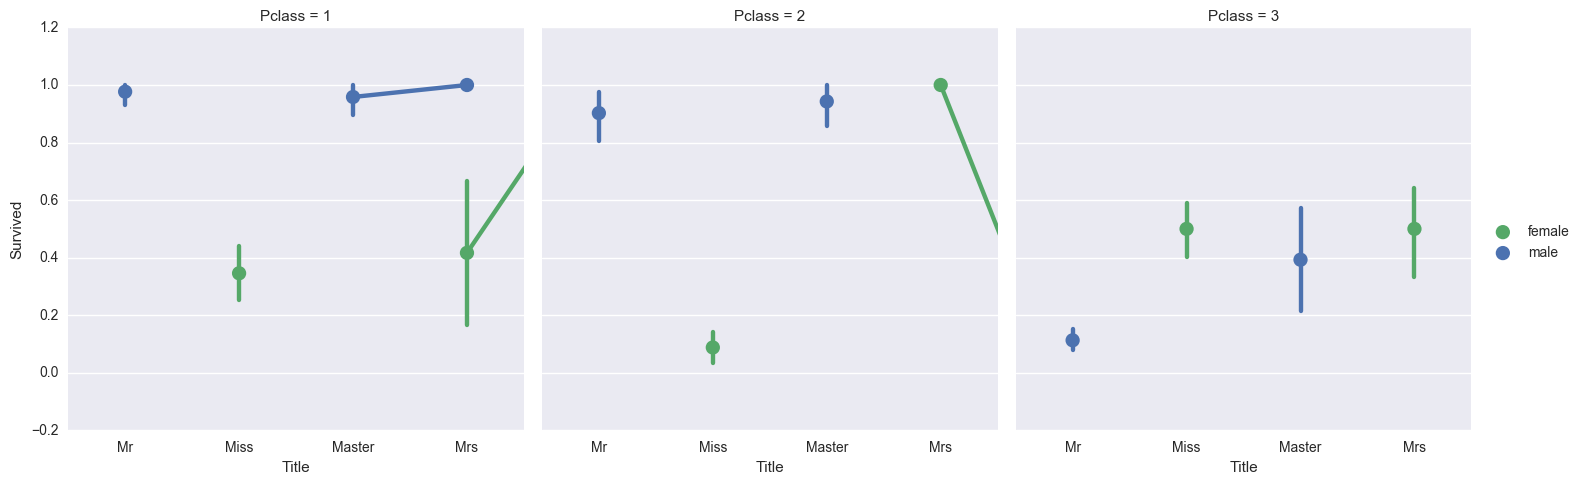

In [34]:
grid = sns.FacetGrid(train_df, col='Pclass', size=5)
grid.map(sns.pointplot, 'Title', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [35]:
rare_title = train_df[train_df.Title=='Rare']
rare_title.Sex.value_counts()

male      20
female     3
Name: Sex, dtype: int64

In [36]:
rare_title.Pclass.value_counts()

1    15
2     8
Name: Pclass, dtype: int64

In [37]:
rare_title.Embarked.value_counts()

S    15
C     6
Q     2
Name: Embarked, dtype: int64

In [38]:
print(rare_title.Age.mean())
rare_title.Age.value_counts()

45.54545454545455


49.0    2
54.0    2
48.0    1
33.0    1
70.0    1
27.0    1
40.0    1
42.0    1
44.0    1
45.0    1
28.0    1
60.0    1
50.0    1
51.0    1
52.0    1
23.0    1
56.0    1
57.0    1
38.0    1
32.0    1
Name: Age, dtype: int64

In [39]:
print(rare_title.shape)
# rare_title_female_or_elderly = rare_title[(rare_title.Sex=='female')|(rare_title.Age>=60)]
rare_title_female_or_elderly = rare_title[(rare_title.Age>60)]
print(rare_title_female_or_elderly.shape)
rare_title_female_or_elderly

(23, 11)
(1, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0,S,Rare


In [40]:
for title in train_df.Title.value_counts().index:
    print(title, 's survival rate is:')
    print(train_df[train_df.Title==title].Survived.mean())

Mr s survival rate is:
0.15667311411992263
Miss s survival rate is:
0.7027027027027027
Mrs s survival rate is:
0.7936507936507936
Master s survival rate is:
0.575
Rare s survival rate is:
0.34782608695652173


#### Observations:
1. Female has higher survival rate than Male
2. Rare title did not lead to higher survival rate.
3. The majority of Rare titles (20 out of 23) are male.
4. All 3 Female Rare title passengers survived. 
5. The average age of Rare title passengers is 45.5. The only 1 60+ Rare title (Title='Capt') passenger did not survive.

In [41]:
# convert the categorical titles to ordinal
title_mapping = {'Mr': 1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset.Title =  dataset.Title.map(title_mapping)
    dataset.Title = dataset.Title.fillna(0)

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [43]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [44]:
# drop the Name feature
train_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
combine =[train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

### Converting categorical features to numeric values

In [45]:
# convert sex 
sex_mapping ={'male':0, 'female':1}
for dataset in combine:
    dataset.Sex = dataset['Sex'].map(sex_mapping).astype(int)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [47]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,3
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,3


#### Complete a numerical continous feature
To use other correlated features to guess missing values in Age.

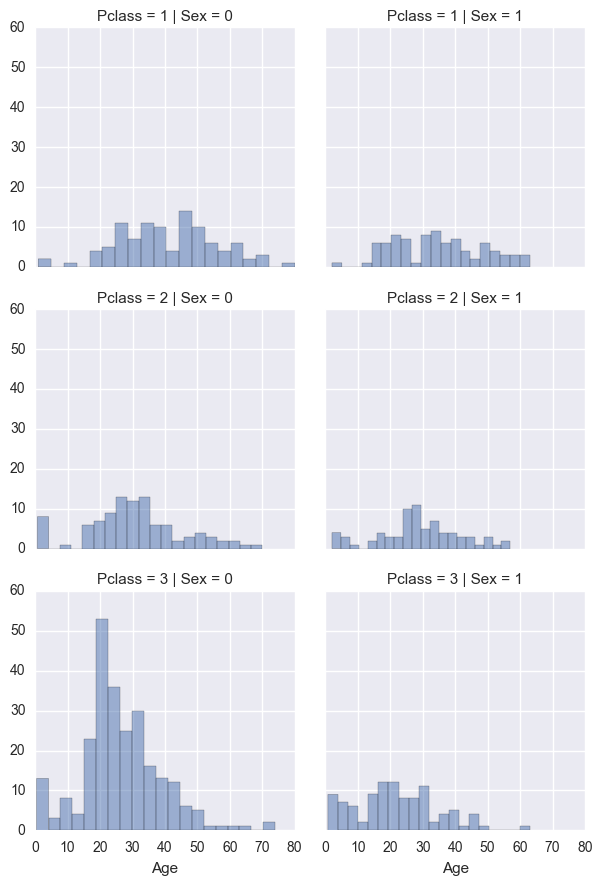

In [48]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [49]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [50]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0,3):
            guess_df =  dataset[(dataset.Sex==i)&(dataset.Pclass==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5 + 0.5)*0.5
    for i in range(0, 2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    print(guess_ages)
    
train_df.head()

[[ 40.   30.   25. ]
 [ 35.   28.   21.5]]
[[ 42.  28.  24.]
 [ 41.  24.  22.]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [51]:
# create 5 Age bands
train_df['AgeBand'] = pd.cut(train_df.Age, 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [52]:
train_df['AgeBand'].value_counts().sort_values()

(64, 80]        11
(48, 64]        69
(-0.08, 16]    100
(32, 48]       216
(16, 32]       495
Name: AgeBand, dtype: int64

In [53]:
for dataset in combine:
    dataset.loc[dataset.Age<=16, 'Age']=0
    dataset.loc[(dataset.Age>16)&(dataset.Age<=32), 'Age']=1
    dataset.loc[(dataset.Age>32)&(dataset.Age<=48), 'Age']=2
    dataset.loc[(dataset.Age>48)&(dataset.Age<=64), 'Age']=3
    dataset.loc[(dataset.Age>64)&(dataset.Age<=80), 'Age']=4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [54]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2,0,0,7.8292,Q,1
1,3,1,2,1,0,7.0000,S,3
2,2,0,3,0,0,9.6875,Q,1
3,3,0,1,0,0,8.6625,S,1
4,3,1,1,1,1,12.2875,S,3


In [55]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [56]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine=[train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Create new feature combining existing features

In [57]:
for dataset in combine:
    dataset['FamilySize'] = dataset.SibSp + dataset.Parch + 1

train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Those who traveled with 3 or 2 other family members had the highest survival rates. 

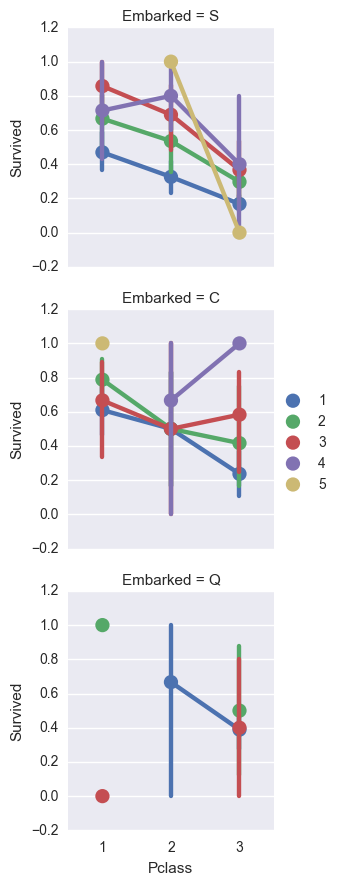

In [58]:
grid = sns.FacetGrid(train_df[train_df.FamilySize<=5], row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'FamilySize', palette='deep')
grid.add_legend()

In [59]:
train_df.loc[train_df.FamilySize==1, 'Sex'].value_counts()

0    411
1    126
Name: Sex, dtype: int64

#### Among thsoe who travelled alone, over 75% were male.

In [60]:
train_df.loc[train_df.FamilySize>1, 'Sex'].value_counts()

1    188
0    166
Name: Sex, dtype: int64

#### Among those who travelled with families, around 50% were male.

In [61]:
female_with_family = train_df.loc[(train_df.FamilySize>1) & (train_df.Sex==1)]
female_with_family[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.966667
1,2,0.931818
2,3,0.416667


#### Those with Sex='female', FamilySize>1, Pclass=1or 2 had very high survival rate (>90%).

In [62]:
male_with_family = train_df.loc[(train_df.FamilySize>1) & (train_df.Sex==0)]
male_with_family[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.425532
1,2,0.277778
2,3,0.180723


#### Those with Sex='male', FamilySize>1 did not survive that much as their female families.

In [63]:
male_alone = train_df.loc[(train_df.FamilySize==1) & (train_df.Sex==0)]
male_alone[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.333333
2,3,0.121212
1,2,0.097222


#### Those with Sex='male', who travelled alone had lower survival rate than those male passengers who travelled with their families in each Pclass.

In [64]:
female_alone = train_df.loc[(train_df.FamilySize==1) & (train_df.Sex==1)]
female_alone[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.970588
1,2,0.906250
2,3,0.616667


#### Those with Sex='female', who travelled alone had similar or even higher survival rate than those female passengers who traveled with their families in each Pclass.

In [65]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset.FamilySize==1, 'IsAlone']=1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### Those traveled with families had higher surval rate than those travelled alone.

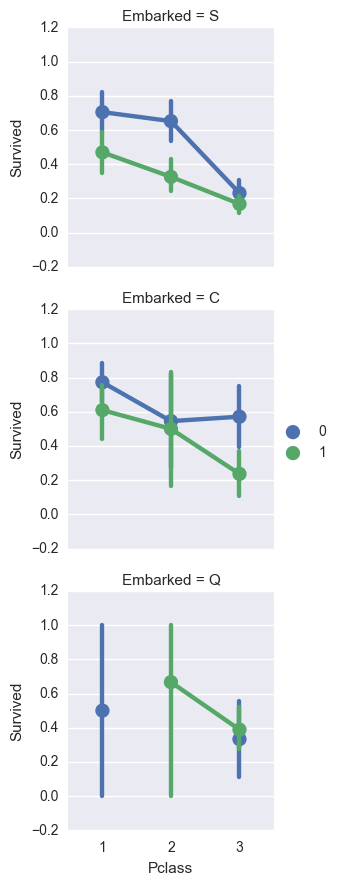

In [66]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'IsAlone', palette='deep')
grid.add_legend()

#### It is very obvious that those who traveled with families all had higher survival rate than those who traveled alone in each Pclass.

### Complete categorical feature

In [67]:
print(type(train_df.Embarked.dropna().mode()))
train_df.Embarked.dropna().mode()

<class 'pandas.core.series.Series'>


0    S
dtype: object

In [68]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [69]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [70]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Those embarked from 'C' port has highest survival rate.

In [71]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,0,1,2,0
1,1,1,1,2,1,0,71.2833,1,3,2,0
2,1,3,1,1,0,0,7.9250,0,2,1,1
3,1,1,1,2,1,0,53.1000,0,3,2,0
4,0,3,0,2,0,0,8.0500,0,1,1,1


#### Complete 'Fare' by replace missing values with median Fare

In [72]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
print(test_df['Fare'].dropna().median())
test_df.head()

14.4542


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,2,0,0,7.8292,2,1,1,1
1,3,1,2,1,0,7.0000,0,3,2,0
2,2,0,3,0,0,9.6875,2,1,1,1
3,3,0,1,0,0,8.6625,0,1,1,1
4,3,1,1,1,1,12.2875,0,3,3,0


#### Cut samples into 4 FareBand

In [73]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,2,1,0,3,1,3,2,0
2,1,3,1,1,0,0,1,0,2,1,1
3,1,1,1,2,1,0,3,0,3,2,0
4,0,3,0,2,0,0,1,0,1,1,1
5,0,3,0,1,0,0,1,2,1,1,1
6,0,1,0,3,0,0,3,0,1,1,1
7,0,3,0,0,3,1,2,0,4,5,0
8,1,3,1,1,0,2,1,0,3,3,0
9,1,2,1,0,1,0,2,1,3,2,0


In [74]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,2,0,0,0,2,1,1,1
1,3,1,2,1,0,0,0,3,2,0
2,2,0,3,0,0,1,2,1,1,1
3,3,0,1,0,0,1,0,1,1,1
4,3,1,1,1,1,1,0,3,3,0
5,3,0,0,0,0,1,0,1,1,1
6,3,1,1,0,0,0,2,2,1,1
7,2,0,1,1,1,2,0,1,3,0
8,3,1,1,0,0,0,1,3,1,1
9,3,0,1,2,0,2,0,1,3,0


### Model, predict and solve
NOw all the features are numeric in the dataset. 
We can train a model and use it to predict the survived. 
Our problem is classification and regression problem.
The machine learning algorithm is Supervised since we are training our model with a labeled training dataset.
Supervised learning + Classification&Regression:
Logistic regression
KNN
SVM
Naive Bayes classifier
Decision tree
Random forest
Perceptron
Neural network
Relevance Vector Machine(RVM)

In [75]:
X_train = train_df.drop(['SibSp','Parch', 'Survived'], axis=1)
y_train = train_df.Survived
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,1,0,0,1,2,0
1,1,1,2,3,1,3,2,0
2,3,1,1,1,0,2,1,1
3,1,1,2,3,0,3,2,0
4,3,0,2,1,0,1,1,1


In [76]:
X_test = test_df.drop(['SibSp','Parch'], axis=1)
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,2,0,2,1,1,1
1,3,1,2,0,0,3,2,0
2,2,0,3,1,2,1,1,1
3,3,0,1,1,0,1,1,1
4,3,1,1,1,0,3,3,0


In [77]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
acc_log

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


81.260000000000005

In [79]:
logreg.coef_[0]

array([-0.87325656,  2.19220697, -0.60722048,  0.28394326,  0.23306089,
        0.48644549, -0.44528826, -0.31222393])

In [80]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [81]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlations'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlations', ascending=False)

,Feature,Correlations
1,Sex,2.192207
5,Title,0.486445
3,Fare,0.283943
4,Embarked,0.233061
7,IsAlone,-0.312224
6,FamilySize,-0.445288
2,Age,-0.607220
0,Pclass,-0.873257


In [82]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.390000000000001

In [83]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.75

In [84]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.689999999999998

In [85]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

NameError: name 'Y_train' is not defined

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
test_df = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/test.csv")

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred # go with the Random Forest's predictions
    })

In [ ]:
submission.head()

In [ ]:
submission.to_csv('C:/Users/fengh/Desktop/Titanic_submission.csv', index=False)